In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

import warnings
warnings.simplefilter("ignore")


In [3]:
font_path = r'C:\Users\KDP-25\AppData\Local\Microsoft\Windows\Fonts\D2Coding-Ver1.3.2-20180524-all.ttc'
myFont = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=myFont)


In [4]:
file_JPN_total_employee = 'DATA/OECD 일본 신규고용 2008-2022.csv'
file_KOR_to_JPN_employee_part1 = 'DATA/한국산업인력공단_해외취업 통계정보_20231231.csv'
file_KOR_to_JPN_employee_part2 = 'DATA/해외취업통계_2008-2012.csv'
file_impression_response = 'DATA/상대국 인상 응답 추이 2013-2023.csv'


In [5]:
impression_response = pd.read_csv(file_impression_response, index_col=0)
impression_response


,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
연도(년),,,,,,,,,,,
한국 여론: 긍정적 인상(%),12.2,17.5,15.5,21.3,26.9,28.3,31.7,12.3,20.5,30.4,28.9
한국 여론: 부정적 인상(%),76.6,71.0,72.7,61.0,56.3,50.6,49.9,71.6,63.2,52.8,53.3
일본 여론: 긍정적 인상(%),31.1,20.5,23.8,29.1,26.9,22.9,20.0,25.9,25.4,30.6,32.8
일본 여론: 부정적 인상(%),37.3,54.4,52.4,44.6,48.6,46.3,49.9,46.3,48.8,40.3,32.8


In [6]:
JPN_total_employee = pd.read_csv(file_JPN_total_employee, index_col=0)
JPN_total_employee.drop('항목', inplace=True)
JPN_total_employee.index.name = None
JPN_total_employee.loc['일본'] = JPN_total_employee.loc['일본'].str.replace(' (Thousand Persons)', '')
JPN_total_employee = (JPN_total_employee.astype(float) / 10).round(0).astype('uint16')
JPN_total_employee.index = ['일본 신규 채용(만명)']
JPN_total_employee.columns = JPN_total_employee.columns.astype('uint16')
JPN_total_employee


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
일본 신규 채용(만명),1716,1627,1584,1539,1570,1572,1579,1570,1568,1583,1595,1594,1574,1559,1557


In [7]:
JPN_total_employee.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 일본 신규 채용(만명) to 일본 신규 채용(만명)
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2008    1 non-null      uint16
 1   2009    1 non-null      uint16
 2   2010    1 non-null      uint16
 3   2011    1 non-null      uint16
 4   2012    1 non-null      uint16
 5   2013    1 non-null      uint16
 6   2014    1 non-null      uint16
 7   2015    1 non-null      uint16
 8   2016    1 non-null      uint16
 9   2017    1 non-null      uint16
 10  2018    1 non-null      uint16
 11  2019    1 non-null      uint16
 12  2020    1 non-null      uint16
 13  2021    1 non-null      uint16
 14  2022    1 non-null      uint16
dtypes: uint16(15)
memory usage: 38.0+ bytes


In [8]:
KOR_to_JPN_employee_part1 = pd.read_csv(file_KOR_to_JPN_employee_part1, index_col=0, encoding='EUC-KR')
KOR_to_JPN_employee_part1 = KOR_to_JPN_employee_part1.T
KOR_to_JPN_employee_part1 = KOR_to_JPN_employee_part1.loc['일본'].to_frame().T
KOR_to_JPN_employee_part1.columns.name = None
KOR_to_JPN_employee_part1


,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
일본,296,338,632,1103,1427,1828,2469,1220,586,1154,1292


In [9]:
KOR_to_JPN_employee_part2 = pd.read_csv(file_KOR_to_JPN_employee_part2, index_col=0)
KOR_to_JPN_employee_part2 = KOR_to_JPN_employee_part2.T
KOR_to_JPN_employee_part2 = KOR_to_JPN_employee_part2.loc['일본'].to_frame().T
KOR_to_JPN_employee_part2.columns.name = None
KOR_to_JPN_employee_part2


,2008,2009,2010,2011,2012
일본,468,250,228,326,323


In [10]:
KOR_to_JPN_employee = pd.concat([KOR_to_JPN_employee_part2, KOR_to_JPN_employee_part1], axis=1)
KOR_to_JPN_employee = KOR_to_JPN_employee.astype('uint16')
KOR_to_JPN_employee.index = ['한국인 신규 채용(명)']
KOR_to_JPN_employee.columns = KOR_to_JPN_employee.columns.astype('uint16')
KOR_to_JPN_employee


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
한국인 신규 채용(명),468,250,228,326,323,296,338,632,1103,1427,1828,2469,1220,586,1154,1292


In [11]:
KOR_to_JPN_employee.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 한국인 신규 채용(명) to 한국인 신규 채용(명)
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2008    1 non-null      uint16
 1   2009    1 non-null      uint16
 2   2010    1 non-null      uint16
 3   2011    1 non-null      uint16
 4   2012    1 non-null      uint16
 5   2013    1 non-null      uint16
 6   2014    1 non-null      uint16
 7   2015    1 non-null      uint16
 8   2016    1 non-null      uint16
 9   2017    1 non-null      uint16
 10  2018    1 non-null      uint16
 11  2019    1 non-null      uint16
 12  2020    1 non-null      uint16
 13  2021    1 non-null      uint16
 14  2022    1 non-null      uint16
 15  2023    1 non-null      uint16
dtypes: uint16(16)
memory usage: 40.0+ bytes


In [12]:
KOR_to_JPN_employment = pd.concat([JPN_total_employee, KOR_to_JPN_employee], axis=0, join='inner')
KOR_to_JPN_employment


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
일본 신규 채용(만명),1716,1627,1584,1539,1570,1572,1579,1570,1568,1583,1595,1594,1574,1559,1557
한국인 신규 채용(명),468,250,228,326,323,296,338,632,1103,1427,1828,2469,1220,586,1154


In [13]:
KOR_to_JPN_employment_pct = KOR_to_JPN_employment.T.pct_change().T
KOR_to_JPN_employment_pct.index = ['일본 신규 채용 변동률(%)', '한국인 신규 채용 변동률(%)']
KOR_to_JPN_employment_pct


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
일본 신규 채용 변동률(%),NaN,-0.051865,-0.026429,-0.028409,0.020143,0.001274,0.004453,-0.005700,-0.001274,0.009566,0.007581,-0.000627,-0.012547,-0.009530,-0.001283
한국인 신규 채용 변동률(%),NaN,-0.465812,-0.088000,0.429825,-0.009202,-0.083591,0.141892,0.869822,0.745253,0.293744,0.281009,0.350656,-0.505873,-0.519672,0.969283


In [14]:
def display_numbers(empDF, col, size):
    for i in range(empDF.shape[1]):
        height = empDF.iloc[col, i]
        plt.text(empDF.columns[i], height+0.25, '%.1f' %height, ha='center', va='bottom', size=size)


In [15]:
def drowArrow(empDF, col, start, end):
    x = (start + end)/2
    y = (empDF[start][col] + empDF[end][col])/2
    y2 = np.mean((empDF.max().max(), empDF.min().min()))
    box = {'facecolor': '.9', 'edgecolor': 'k',
           'boxstyle': 'round', 'alpha': 0.6, 'mutation_scale': 2}
    arrow = {'facecolor': '#E8D9FF', 'edgecolor': '#A566FF', 'arrowstyle': 'fancy'}

    plt.annotate(f'NO Japan 운동', ha='center', va='center',
                 xytext=(x-1.4, y2*0.7),
                 xy=(x, y),
                 arrowprops=arrow, bbox=box, color='#FF0000', size=20)



In [16]:
def draw_single_graph(empDF, title,
                      colorList=['#4374D9', '#FF5E00', '#8041D9', '#86E57F'],
                      makerList=None, display_values=False, display_arrow=False):
    if len(colorList) < empDF.shape[0]:
        print(f'배정된 색상 목록이 {empDF.shape[0]}개 이상이어야 합니다.')
        return -1
    elif makerList != None and len(makerList) < empDF.shape[0]:
        print(f'배정된 마커 목록이 {empDF.shape[0]}개 이상이어야 합니다.')
        return -1
    else:
        plt.figure(figsize=(12, 6))
        x = empDF.columns
        for i in range(empDF.shape[0]):
            plt.plot(x, empDF.loc[empDF.index[i]], color=colorList[i],
                     marker=makerList[i] if makerList != None else None, label=empDF.values)
            if display_values:
                display_numbers(empDF, i, 12)
            if display_arrow:
                drowArrow(empDF, i, 2019, 2020)
            plt.xticks(x, x)
            plt.xlabel('연도(년)')
        plt.title(title, size=25)
        plt.legend(empDF.index)
        plt.grid()
        plt.show()


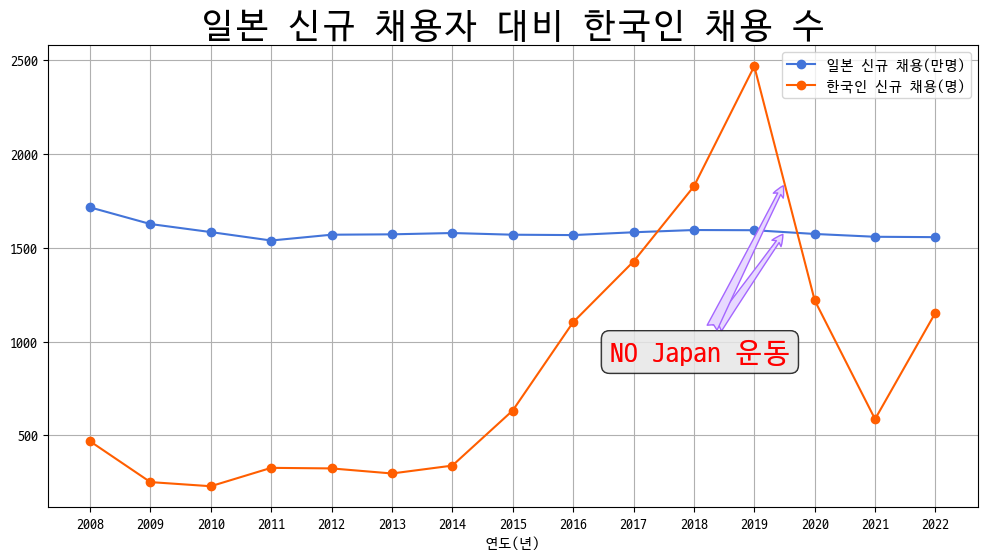

In [17]:
draw_single_graph(KOR_to_JPN_employment, '일본 신규 채용자 대비 한국인 채용 수', makerList=['o'] *2, display_arrow=True)


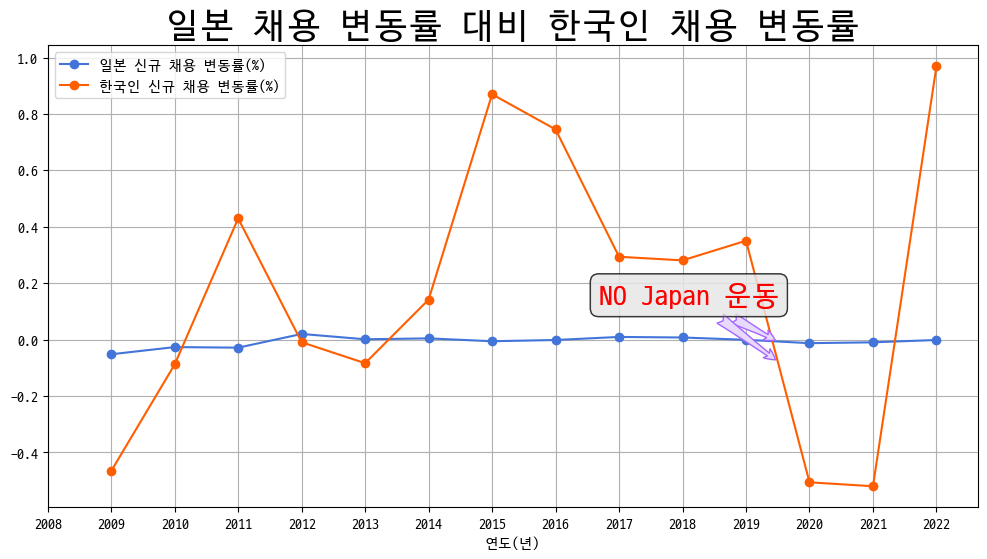

In [18]:
draw_single_graph(KOR_to_JPN_employment_pct, '일본 채용 변동률 대비 한국인 채용 변동률', makerList=['o'] *2, display_arrow=True)


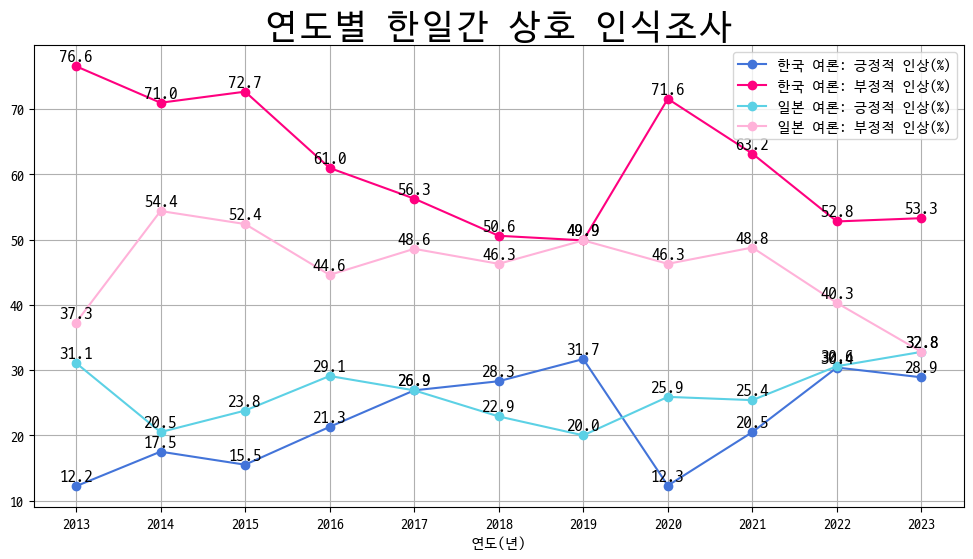

In [20]:
draw_single_graph(impression_response, '연도별 한일간 상호 인식조사',colorList=['#4374D9', '#FF007F', '#5CD1E5', '#FFB2D9'], makerList=['o'] * 4, display_values=True)
